# Training out model on IMDB_reviews datasets from tensorflow datasets

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
imdb , info = tfds.load('imdb_reviews' , with_info =  True  , as_supervised = True)  #loading 'imdb_reviews' from tensorflow datasets.
train , test = imdb['train'] , imdb['test']  #initializing test and train data.

In [3]:
train_sentences = []
train_labels = []

test_sentences = []
test_labels = []

for s , l in train:
    train_sentences.append(str(s.numpy()))  #retrieving train_data.
    train_labels.append(l.numpy())  #retrieving train_labels.

for s , l in test:
    test_sentences.append(str(s.numpy()))  #retrieving test_data.
    test_labels.append(l.numpy())  #retrieving test_labels.

In [4]:
padding_type = 'post'       #Initializing the parameter values for later use.
truncating_type = 'post'
embedding_dim = 16
vocab_size = 10000
max_len = 120


tokenizer = Tokenizer(num_words = vocab_size , oov_token = "<OOV>")
tokenizer.fit_on_texts(train_sentences)  #Creating vocab
word_indices = tokenizer.index_word  

In [5]:

train_sequences = tokenizer.texts_to_sequences(train_sentences)  #converting train_text to sequence.
train_padded = pad_sequences(train_sequences , padding = padding_type , maxlen = max_len , truncating = truncating_type)  #padding train_sequence the sequences.

test_sequences = tokenizer.texts_to_sequences(test_sentences)  #converting test_text to sequence.
test_padded = pad_sequences(test_sequences , padding = padding_type , maxlen = max_len , truncating = truncating_type)  #padding test_sequence the sequences.

train_labels_final = np.array(train_labels)  #array of train labels.
test_labels_final = np.array(test_labels)  #array of test labels.

In [6]:
model = tf.keras.models.Sequential([  #Sequential Model
    tf.keras.layers.Embedding(vocab_size , embedding_dim , input_length = max_len),  #Embeddding dim of '16'
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 16)),  #'LSTM' of '16' units.
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')  #activation = 'sigmoid' for msingle output because of binary_crossentropy.
])

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])   

In [7]:
class Callback(tf.keras.callbacks.Callback):  #Class for early stopping to not to overfit.
    def end_to_epoch(self , epochs , logs = {}):
        print("Reached maximum accuracy. Terminating training ! ")
        if(logs.get(['accuracy'])>0.99):   #cancel training at '99%' accuracy.
            self.model.stop_training = True

callbacks = Callback()   

In [8]:
history = model.fit(train_padded,
                     train_labels_final,
                     validation_data = (test_padded , test_labels_final),
                     epochs = 10, 
                     callbacks = [callbacks])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 84s 3ms/sample - loss: 0.4531 - accuracy: 0.7768 - val_loss: 0.3848 - val_accuracy: 0.8270
Epoch 2/10
25000/25000 [==============================] - 68s 3ms/sample - loss: 0.2811 - accuracy: 0.8876 - val_loss: 0.4119 - val_accuracy: 0.8175
Epoch 3/10
25000/25000 [==============================] - 67s 3ms/sample - loss: 0.2115 - accuracy: 0.9178 - val_loss: 0.4768 - val_accuracy: 0.8186
Epoch 4/10
25000/25000 [==============================] - 67s 3ms/sample - loss: 0.1641 - accuracy: 0.9375 - val_loss: 0.5856 - val_accuracy: 0.7934
Epoch 5/10
25000/25000 [==============================] - 68s 3ms/sample - loss: 0.1222 - accuracy: 0.9552 - val_loss: 0.5950 - val_accuracy: 0.8044
Epoch 6/10
25000/25000 [==============================] - 70s 3ms/sample - loss: 0.0918 - accuracy: 0.9690 - val_loss: 0.7140 - val_accuracy: 0.7902
Epoch 7/10
25000/25000 [==============================] 

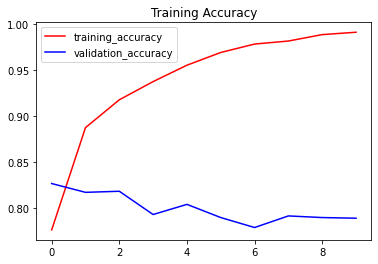

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training_accuracy')
plt.plot(epochs , val_acc , 'b' , label = 'validation_accuracy')
plt.title("Training Accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()